In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import preprocessor as p

from IPython import display
from textblob import TextBlob
import pickle

%matplotlib inline
plt.style.use('fivethirtyeight')

In [31]:
handles = pd.read_csv("statsocial_political_journalists.csv")

del handles['Unnamed: 7']
del handles['Unnamed: 11']

handles = handles['Username'].values.tolist()

In [32]:
with open("handles.pkl", 'rb') as picklefile: 
    handles = pickle.load(picklefile)

In [33]:
len(handles)

1639

In [2]:
import requests
from requests_oauthlib import OAuth1

#OAuth ~ simple way to to publish & interact with data

In [3]:
# Importing our Config

# import cnfg
import os
# config = cnfg.load(".twitter_config")

oauth = OAuth1(os.environ['TWITTER_API_KEY'],
               os.environ["TWITTER_API_SECRET"],
               os.environ["TWITTER_ACCESS_TOKEN"],
               os.environ["TWITTER_ACCESS_TOKEN_SECRET"])

In [4]:
# This "user_timeline" url tells the API to get the tweets of the user associated with the app.
response = requests.get("https://api.twitter.com/1.1/statuses/user_timeline.json",
                        auth=oauth)

# Note that we're using the "requests" library
tweets = response.json()

In [5]:
# encoding: utf-8

import tweepy #https://github.com/tweepy/tweepy
import csv

def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(os.environ['TWITTER_API_KEY'],
                           os.environ["TWITTER_API_SECRET"])
    auth.set_access_token(os.environ["TWITTER_ACCESS_TOKEN"],
                          os.environ["TWITTER_ACCESS_TOKEN_SECRET"])
    api=tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print("getting tweets before %s" % (oldest))

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print("...%s tweets downloaded so far" % (len(alltweets)))

    #transform the tweepy tweets into a 2D array that will populate the csv	
    outtweets = [[tweet.id_str, tweet.created_at, p.clean(tweet.text)] for tweet in alltweets]

    #write the csv
    with open('tweets/%s_tweets.csv' % screen_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)

    pass

In [6]:
import os
cwd = os.getcwd()
cwd

'/Users/jeremy/ds/metis/metisgh/chi17_ds2/student_submissions/projects/Fletcher'

In [15]:
handles[1000]

'edroso'

In [38]:
handles[0]

'borowitzreport'

In [19]:
get_all_tweets('mattbetz_irl')

getting tweets before 842131506227208191
...398 tweets downloaded so far
getting tweets before 817253902613549056
...596 tweets downloaded so far
getting tweets before 796751532968415231
...796 tweets downloaded so far
getting tweets before 754012861806940159
...995 tweets downloaded so far
getting tweets before 734978292302766080
...1195 tweets downloaded so far
getting tweets before 722090551164542975
...1392 tweets downloaded so far
getting tweets before 713261606323355647
...1588 tweets downloaded so far
getting tweets before 707449889446359039
...1762 tweets downloaded so far
getting tweets before 692984222651391999
...1762 tweets downloaded so far


In [19]:
edroso = pd.read_csv("tweets/edroso_tweets.csv")['text']
edroso[2]

'My latest fan, wanna follow? (Warning: He likes to talk about sheep!)'

In [20]:
i = 1
for handle in handles[i-1:]:
    print(handle, ' ',i,'/',len(handles))
    try:
        get_all_tweets(handle)
        handles.remove(handle)
    except tweepy.TweepError:
        time.sleep(60 * 15)
        continue 
    except:
        print("(╯°□°）╯︵ ┻━┻")
    i+=1
    display.clear_output(wait=True)
    time.sleep(5)

JenniferPreston   3 / 1639


KeyboardInterrupt: 

In [16]:
handles

['borowitzreport',
 'postreid',
 'JenniferPreston',
 'nytimescollins',
 'sdoocy',
 'ShawnaNBCNews',
 'stefanjbecket',
 'jennafnc',
 'gatewaypundit',
 'LizMair',
 'thejuanwilliams',
 'stevebenen',
 'owillis',
 'jackgraycnn',
 'PamelaGeller',
 'davidmuir',
 'stupolitics',
 'vplus',
 'feministabulous',
 'esqpolitics',
 'grahamdavida',
 'poniewozik',
 'lexim',
 'JustinElliott',
 'marincogan',
 'Atrios',
 'bethreinhard',
 'shushwalshe',
 'michelleinbklyn',
 'judgejeanine',
 'amandamarcotte',
 'michaelroston',
 'RickHertzberg',
 'marcacaputo',
 'spiegelpeter',
 'joshledermanap',
 'LisaDNews',
 'katebolduan',
 'jamestaranto',
 'TimothyNoah1',
 'daaronovitch',
 'carol_e_lee',
 'scottpelley',
 'jmsummers',
 'michaelbarone',
 'chrislicht',
 'evanchill',
 'jasondhorowitz',
 'contessabrewer',
 'mysterypollster',
 'normative',
 'vodkapundit',
 'pbump',
 'jricole',
 'jenniferjjacobs',
 'patrickwintour',
 'jtLOL',
 'davidnakamura',
 'aceofspadeshq',
 'juliebosman',
 'ishasesaycnn',
 'heminator',
 'sa

In [17]:
with open('handles.pkl', 'wb') as picklefile:
    pickle.dump(handles, picklefile)


In [23]:
handles[155]

'JenniferPreston'

In [27]:
get_all_tweets(handles[156])

getting tweets before 260762414071554051
...400 tweets downloaded so far
getting tweets before 19136368349286400
...600 tweets downloaded so far
getting tweets before 4562435557
...682 tweets downloaded so far
getting tweets before 1181990018
...682 tweets downloaded so far


In [11]:
handles[72]

'costareports'

In [16]:
jordan = list(pd.read_csv("tweets/imyeimyeimye_tweets.csv")['text'].astype(str))
jordan

[': dam girl can i call u dumbledore cuz ur the head master',
 "Eventually youll realize life is short. Listen to whatever music you want. Hang with who you want. DO what you want. Its all you'll regret.",
 'I heard if you Inject marijuanas you could speed it up',
 'I will end your short time on earth',
 'But $$$$$$$$$$$ gotta ensure we get those $$$$$$ who cares about the long term health of the planet ️',
 ': When will my serotonin return from war?',
 ': What President Trump did today by withdrawing from the Paris Climate Accord is an international disgrace.',
 'Yes',
 'Travis scott*',
 "You popped up on me by surprise see I never took you for the popping type damn it's am so please believe the hype",
 "If I have to parallel park don't invite me",
 ": we're making progress",
 'Me irl',
 "The last time I was somebody's type I was donating blood",
 'times for the bando shoot times at the window',
 ': wheres my invite',
 "Just wait until you don't have that tho. Enjoy it bro.",
 'me irl

In [20]:
matt = list(pd.read_csv("tweets/mattbetz_irl_tweets.csv")['text'].astype(str))
matt

['Roll up in the bitch still smell like an ounce Right quick, right quick Tight jeans on so she feels my shit',
 'Somethin Tells Me by Bryson Tiller',
 "Making major changes to the life I'm living I had no choice, I had to prove I made the right decisions",
 'nan',
 ': tell your friends you love them while you still have the chance',
 'Damn was raw as fuck last night',
 'Hey Arnold (Remi by Rico Nasty',
 ': Wounded people sing better songs',
 'Know the strands you like, know the brands you like What kind of man you like? Wanna eand your life',
 'All We Need feat. Shy Girls - Dzeko &amp; Torres Remix Radio Edit by ODESZA',
 ': Quote of the day:',
 ': "Everything with a title eventually comes to an end" -',
 ": Here's a dog realizing he can stand in a pool",
 'I recommend reading the book How to Stop Worrying and Start Living by Dale Carnegie! Could help you out some',
 ": Healing is not a one time thing. It's an on going process. It will not happen over night and the scars will stay wit

In [18]:
with open('jordan.pkl', 'wb') as picklefile:
    pickle.dump(jordan, picklefile)

thefile = open('jordan.txt', 'w')

for tweet in jordan:
  thefile.write("%s\n" % tweet)

In [21]:
with open('matt.pkl', 'wb') as picklefile:
    pickle.dump(matt, picklefile)

thefile = open('matt.txt', 'w')

for tweet in matt:
  thefile.write("%s\n" % tweet)

In [10]:
def sentiment_plot(tweet_history):
    polarity = np.zeros(len(tweet_history))
    subjectivity = np.zeros(len(tweet_history))

    for tweet in range(len(tweet_history)):
        polarity[tweet] = TextBlob(tweet_history[tweet]).sentiment.polarity
        subjectivity[tweet] = TextBlob(tweet_history[tweet]).sentiment.subjectivity

    print('µ polarity: ',np.mean(polarity).round(2),' σ polarity: ',np.std(polarity).round(2),' µ subjectivity: ',np.mean(subjectivity).round(2),' σ subjectivity: ',np.std(subjectivity).round(2))
    plt.figure(figsize=(12,8))
    plt.plot(polarity, subjectivity, "o", alpha =.2)
    plt.xlabel("polarity")
    plt.ylabel("subjectivity")

In [12]:
nate = pd.read_csv("tweets/NateSilver538_tweets.csv")

megan = pd.read_csv("tweets/megynkelly_tweets.csv")

arianna = pd.read_csv("tweets/ariannahuff_tweets.csv")

nate = nate['text']

megan = megan['text']

arianna = arianna['text']

µ polarity:  0.04  σ polarity:  0.24  µ subjectivity:  0.22  σ subjectivity:  0.32


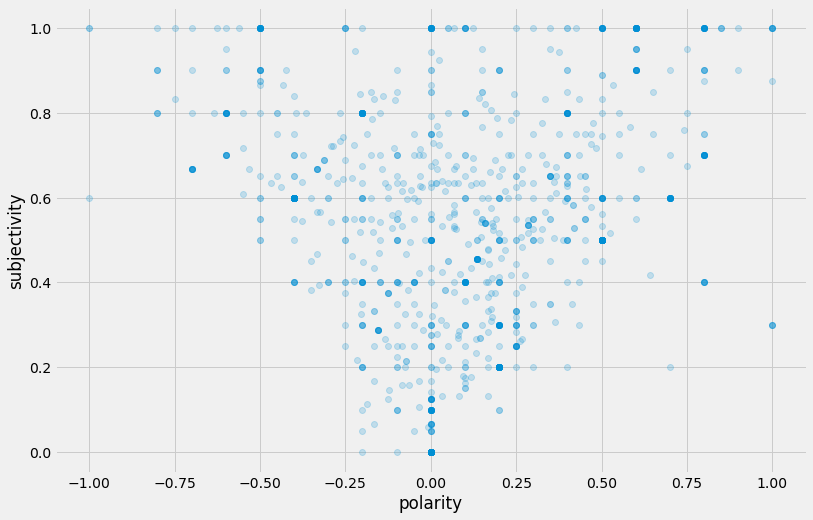

In [15]:
sentiment_plot(jordan)

µ polarity:  0.11  σ polarity:  0.28  µ subjectivity:  0.35  σ subjectivity:  0.32


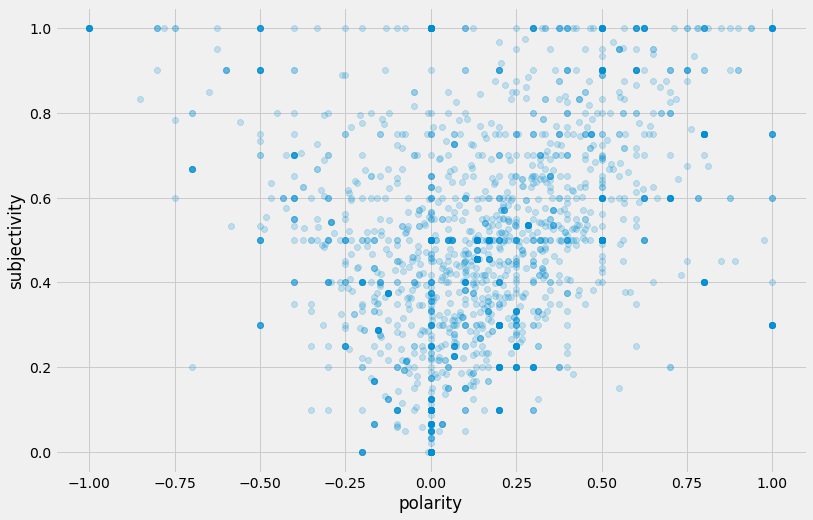

In [14]:
sentiment_plot(megan)

µ polarity:  0.11  σ polarity:  0.29  µ subjectivity:  0.32  σ subjectivity:  0.33


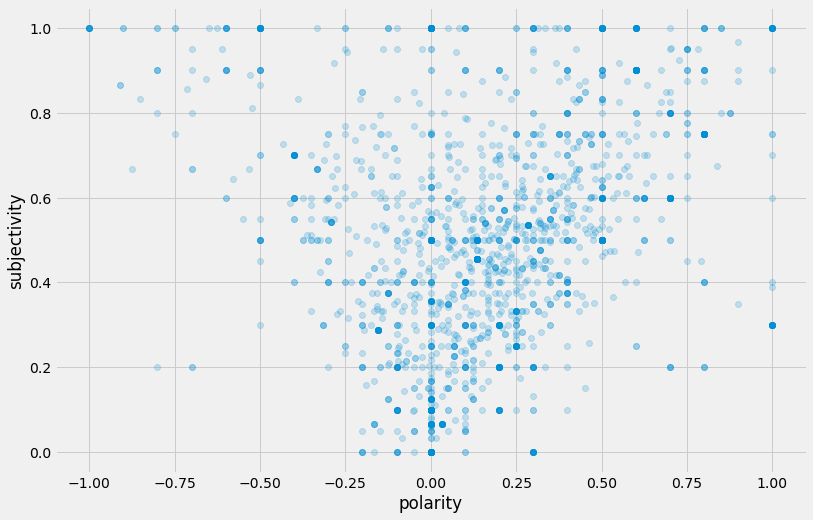

In [15]:
sentiment_plot(arianna)